In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

In [2]:
# --------------------------
# Load Data
# --------------------------
realestate = pd.read_csv("realestate.csv")
iris = pd.read_csv("iris_2.csv")

           Size     Value     Price
Size   1.000000  0.925711  0.913319
Value  0.925711  1.000000  0.851384
Price  0.913319  0.851384  1.000000


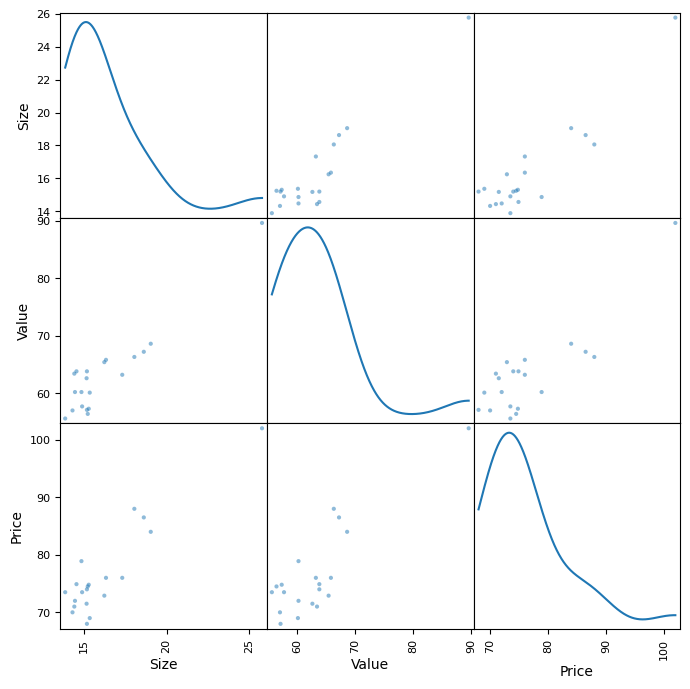

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     42.83
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           2.30e-07
Time:                        16:38:42   Log-Likelihood:                -51.651
No. Observations:                  20   AIC:                             109.3
Df Residuals:                      17   BIC:                             112.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9666      7.882      3.929      0.0

In [3]:
# --------------------------
# Question 1
# --------------------------

# a. Correlation and scatterplot matrix
print(realestate.corr())
pd.plotting.scatter_matrix(realestate, figsize=(8, 8), diagonal='kde')
plt.show()

# b. Fit multiple regression model Price ~ Value + Size
realestate_model = ols('Price ~ Value + Size', data=realestate).fit()
print(realestate_model.summary())

# f. Reduced model Price ~ Size
reduced_model = ols('Price ~ Size', data=realestate).fit()
anova_results = sm.stats.anova_lm(reduced_model, realestate_model)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:           Sepal_Length   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     43.36
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           2.27e-09
Time:                        16:39:57   Log-Likelihood:                -81.950
No. Observations:                 100   AIC:                             167.9
Df Residuals:                      98   BIC:                             173.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0934      0.484      6.387      

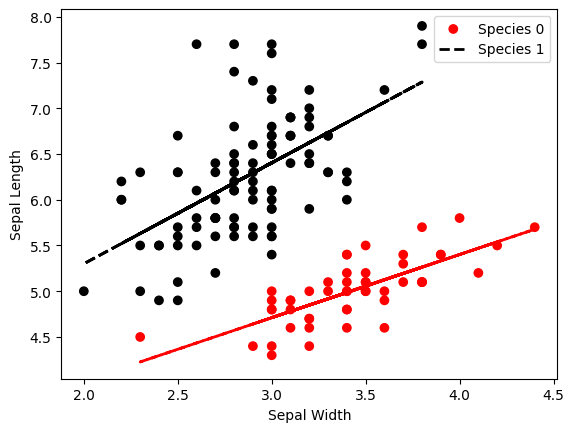

   df_resid        ssr  df_diff   ss_diff          F    Pr(>F)
0     147.0  12.204563      0.0       NaN        NaN       NaN
1     146.0  10.757747      1.0  1.446816  19.635624  0.000018
                            OLS Regression Results                            
Dep. Variable:            Sepal_Width   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     79.39
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.63e-30
Time:                        16:39:57   Log-Likelihood:                -15.215
No. Observations:                 150   AIC:                             38.43
Df Residuals:                     146   BIC:                             50.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     

In [6]:
# --------------------------
# Question 2
# --------------------------
iris.columns = [col.replace('.', '_') for col in iris.columns]

# a. Separate linear models by Species
species_0 = iris[iris['Species'] == 0]
species_1 = iris[iris['Species'] == 1]
# Replace dots with underscores

model0 = ols('Sepal_Length ~ Sepal_Width', data=species_0).fit()
model1 = ols('Sepal_Length ~ Sepal_Width', data=species_1).fit()
print(model0.summary())
print(model1.summary())

# Plot with regression lines
colors = iris['Species'].map({0:'black', 1:'red', 2:'blue'})
plt.scatter(iris['Sepal_Width'], iris['Sepal_Length'], c=colors)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

# Regression lines
plt.plot(species_0['Sepal_Width'], model0.predict(species_0), color='black', linestyle='--', linewidth=2)
plt.plot(species_1['Sepal_Width'], model1.predict(species_1), color='red', linestyle='--', linewidth=2)

plt.legend(['Species 0', 'Species 1'])
plt.show()

# c. Full and reduced model with interaction
iris_model1 = ols('Sepal_Width ~ Sepal_Length * Species', data=iris).fit()
iris_model2 = ols('Sepal_Width ~ Sepal_Length + Species', data=iris).fit()
anova_iris = sm.stats.anova_lm(iris_model2, iris_model1)
print(anova_iris)
print(iris_model1.summary())


In [7]:

# --------------------------
# Question 3
# --------------------------

# b. Compute days to decrease quality by 1
# Given coefficients
beta_no_rain = -0.03145
beta_with_rain = -0.03145 - 0.08314

days_no_rain = 1 / beta_no_rain
days_with_rain = 1 / beta_with_rain

print("Days to decrease quality by 1 (no rain):", round(days_no_rain, 1))
print("Days to decrease quality by 1 (with rain):", round(days_with_rain, 1))

Days to decrease quality by 1 (no rain): -31.8
Days to decrease quality by 1 (with rain): -8.7
